Erosion

In [15]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
# from scipy.stats import signaltonoise
# from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab

<Figure size 640x480 with 0 Axes>

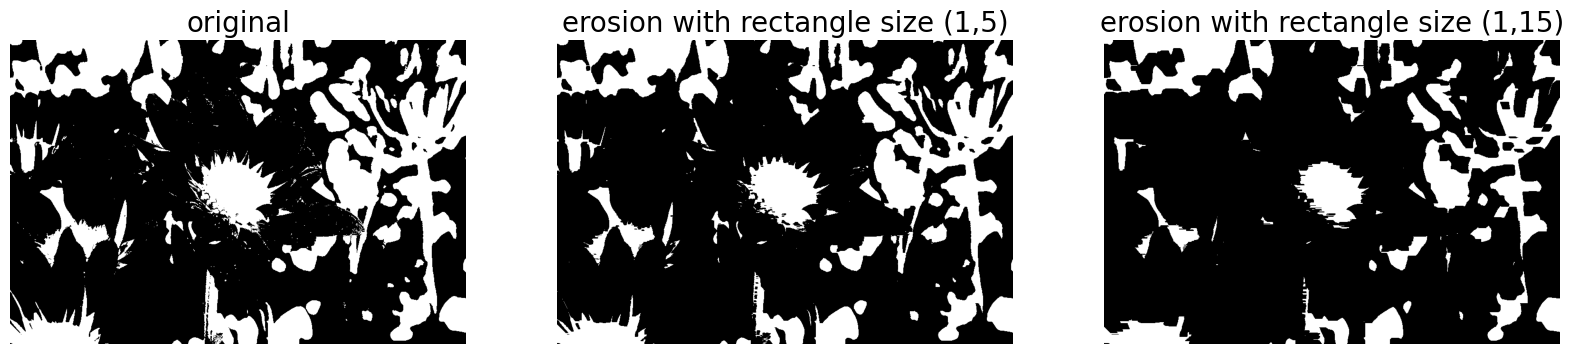

In [4]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as pylab
from skimage.morphology import binary_erosion, rectangle
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks
im = rgb2gray(imread('./images/flowers.jpg'))
im[im <= 0.5] = 0 # create binary image with fixed threshold 0.5
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1), plot_image(im, 'original')
im1 = binary_erosion(im, rectangle(1,5))
pylab.subplot(1,3,2), plot_image(im1, 'erosion with rectangle size (1,5)')
im1 = binary_erosion(im, rectangle(1,15))
pylab.subplot(1,3,3), plot_image(im1, 'erosion with rectangle size (1,15)')
pylab.show()

Dilation


<Figure size 640x480 with 0 Axes>

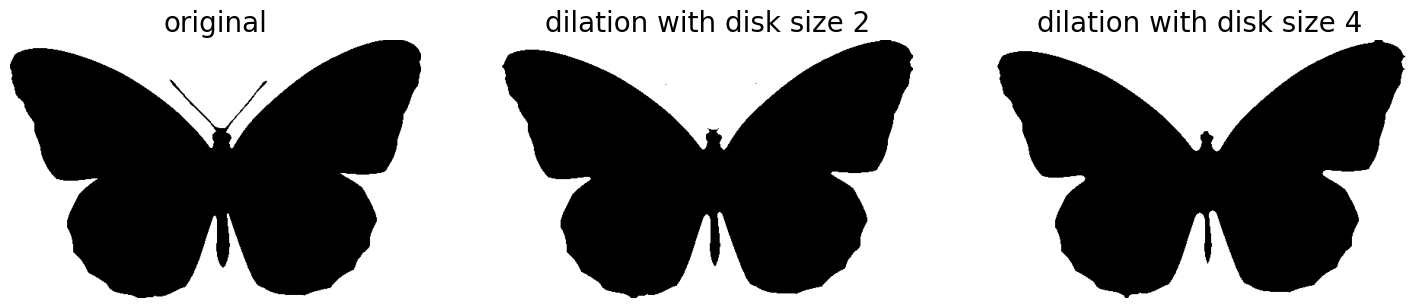

In [14]:
from skimage.morphology import binary_dilation, disk
from skimage import img_as_float
im = img_as_float(imread('./images/butterfly.png'))
im = 1 - im[...,3]
im[im <= 0.5] = 0
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(18,9))
pylab.subplot(131)
pylab.imshow(im)
pylab.title('original', size=20)
pylab.axis('off')
for d in range(1,3):
    pylab.subplot(1,3,d+1)
    im1 = binary_dilation(im, disk(2*d))
    pylab.imshow(im1)
    pylab.title('dilation with disk size ' + str(2*d), size=20)
    pylab.axis('off')
pylab.show()

Morphological contrast enhancement

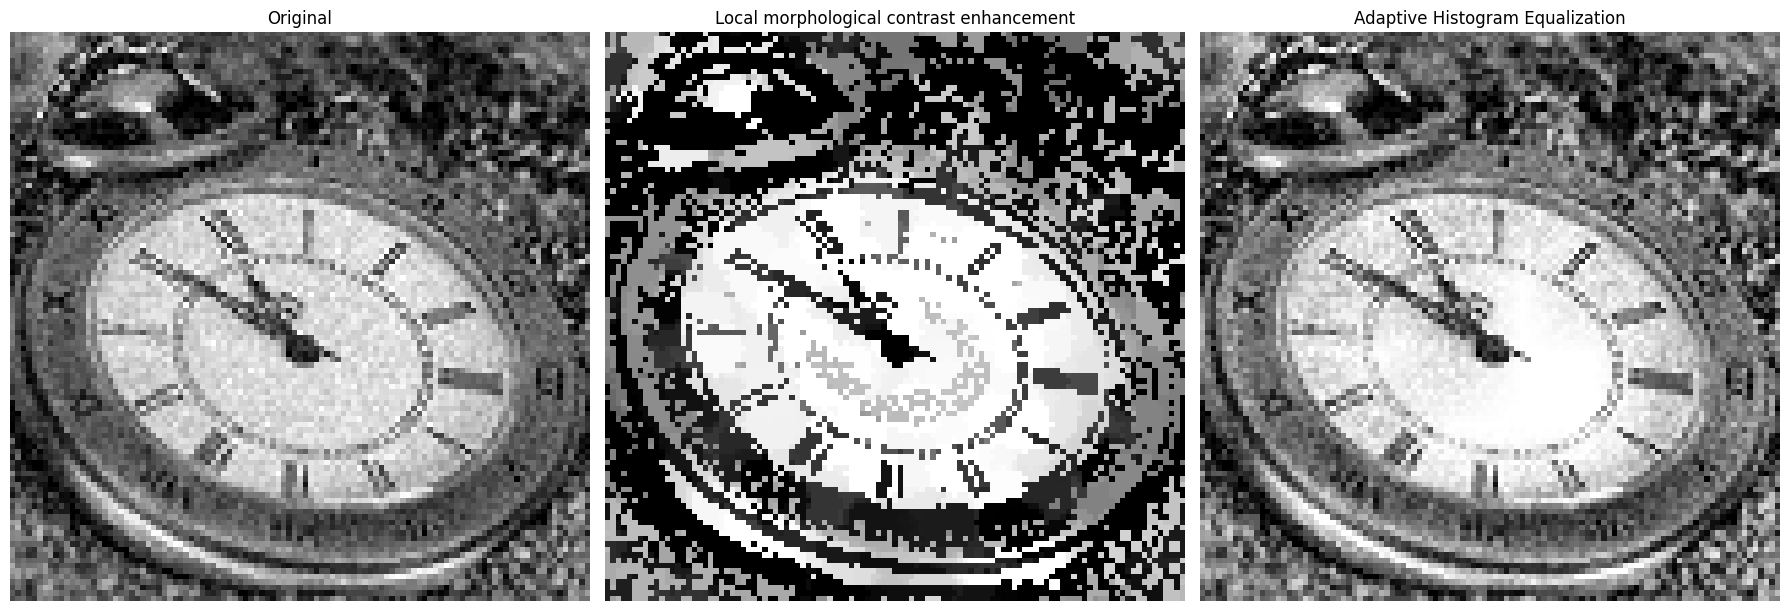

In [22]:
from skimage import exposure
from skimage.filters.rank import enhance_contrast
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import disk
import numpy as np
import matplotlib.pyplot as plt

# Hàm hiển thị ảnh
def plot_gray_image(ax, image, title):
    ax.imshow(image, cmap='gray', vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis('off')

# Đọc ảnh và thêm nhiễu
image = rgb2gray(imread('./images/clock.jpg'))
sigma = 0.05
noisy_image = np.clip(image + sigma * np.random.standard_normal(image.shape), 0, 1)
noisy_image_uint8 = (noisy_image * 255).astype(np.uint8)

# Tăng cường tương phản
enhanced_image = enhance_contrast(noisy_image_uint8, disk(5))
equalized_image = exposure.equalize_adapthist(noisy_image) * 255  # Chuyển lại về [0, 255] để hiển thị tốt hơn

# Vẽ các hình ảnh
fig, axes = plt.subplots(1, 3, figsize=[18, 7], sharex='row', sharey='row')
axes1, axes2, axes3 = axes.ravel()

plot_gray_image(axes1, noisy_image_uint8, 'Original')
plot_gray_image(axes2, enhanced_image, 'Local morphological contrast enhancement')
plot_gray_image(axes3, equalized_image, 'Adaptive Histogram Equalization')

plt.tight_layout()
plt.show()
